In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
df = pd.DataFrame(wine.data)

In [5]:
df.columns = wine.feature_names

In [6]:
target = pd.DataFrame(wine.target)

In [7]:
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


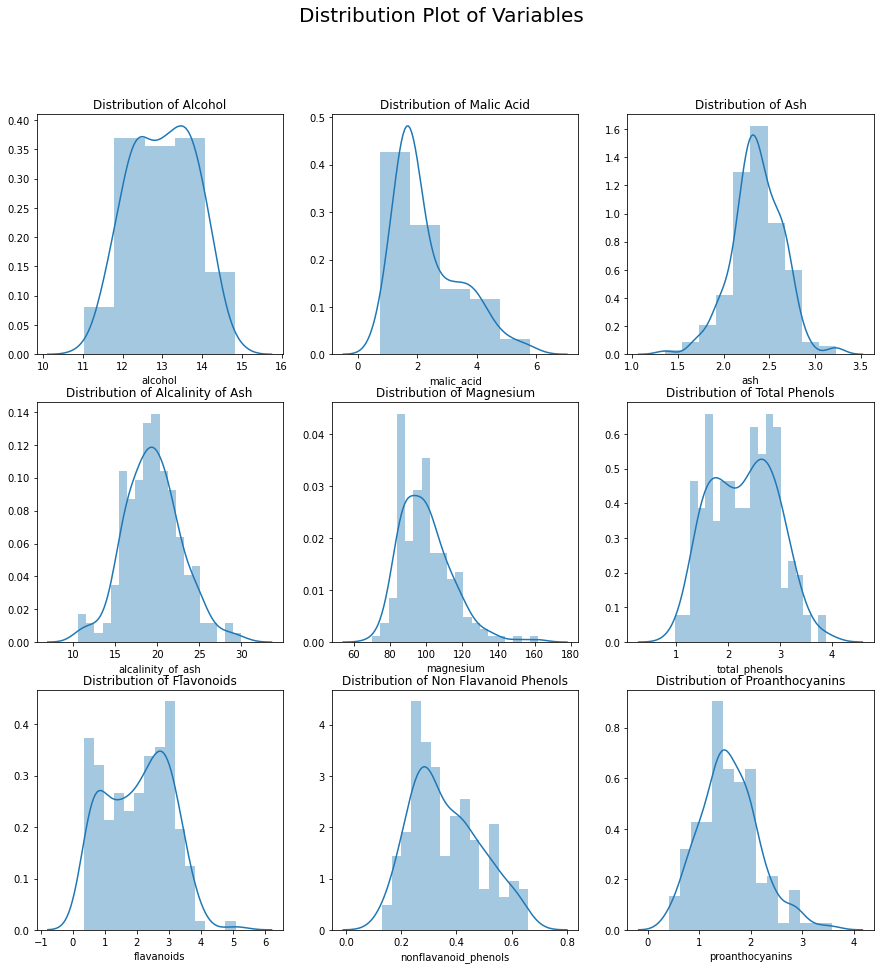

In [8]:
# Creating distribution plot of variables
plt.figure(1,figsize=(15,15))
plt.subplot(331)
sn.distplot(df['alcohol'],bins=5).set_title('Distribution of Alcohol')
plt.subplot(332)
sn.distplot(df['malic_acid'],bins=5).set_title('Distribution of Malic Acid')
plt.subplot(333)
sn.distplot(df['ash'],bins=10).set_title('Distribution of Ash')
plt.subplot(334)
sn.distplot(df['alcalinity_of_ash'],bins=20).set_title('Distribution of Alcalinity of Ash')
plt.subplot(335)
sn.distplot(df['magnesium'],bins=20).set_title('Distribution of Magnesium')
plt.subplot(336)
sn.distplot(df['total_phenols'],bins=20).set_title('Distribution of Total Phenols')
plt.subplot(337)
sn.distplot(df['flavanoids'],bins=15).set_title('Distribution of Flavonoids')
plt.subplot(338)
sn.distplot(df['nonflavanoid_phenols'],bins=15).set_title('Distribution of Non Flavanoid Phenols')
plt.subplot(339)
sn.distplot(df['proanthocyanins'],bins=15).set_title('Distribution of Proanthocyanins')
plt.suptitle('Distribution Plot of Variables',fontsize=20)
plt.show()

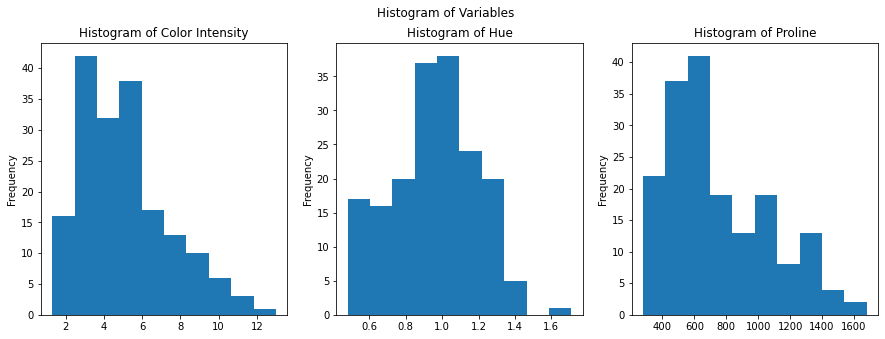

In [9]:
# Creating histogram of variables
plt.figure(2,figsize=(15,5))
plt.subplot(131)
df['color_intensity'].plot.hist(bins=10).set_title('Histogram of Color Intensity')
plt.subplot(132)
df['hue'].plot.hist(bins=10).set_title('Histogram of Hue')
plt.subplot(133)
df['proline'].plot.hist(bins=10).set_title('Histogram of Proline')
plt.suptitle('Histogram of Variables')
plt.show()

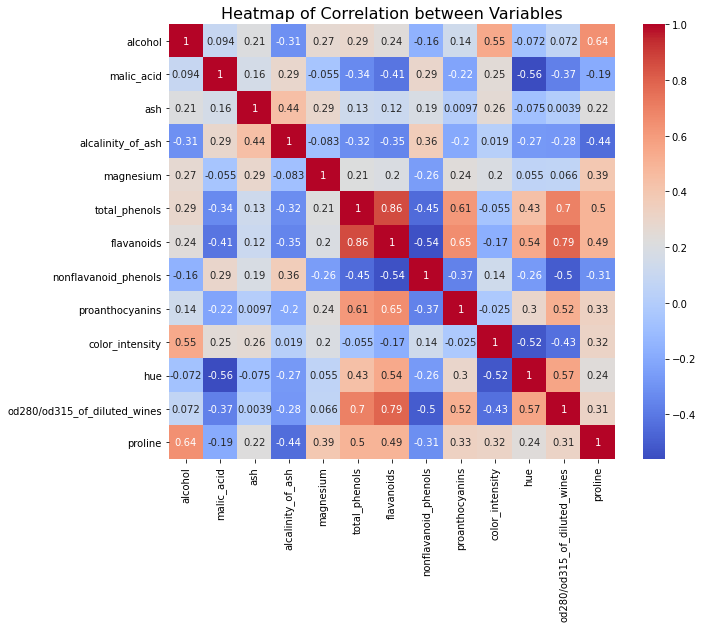

In [10]:
# Creating heatmap of correlations
sn.heatmap(df.corr(),annot=True,cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Heatmap of Correlation between Variables',fontsize=16)
plt.show()

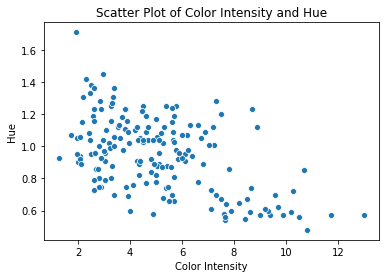

In [11]:
# Creating scatter plot of color intensity and hue
sn.scatterplot(x='color_intensity',y='hue',data=df).set_title('Scatter Plot of Color Intensity and Hue')
plt.xlabel('Color Intensity')
plt.ylabel('Hue')
plt.show()

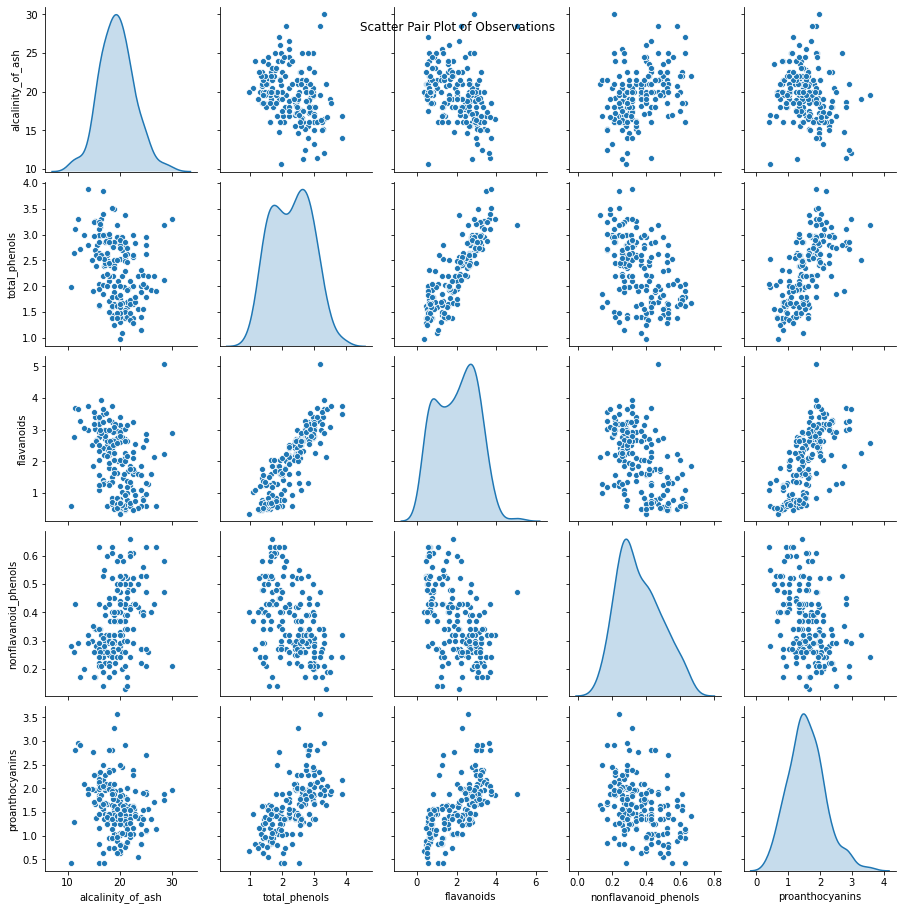

In [12]:
# Scatter pair plot considering kde as diagnol plot
sn.pairplot(df[['alcalinity_of_ash','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins']],kind='scatter',diag_kind='kde')
plt.suptitle('Scatter Pair Plot of Observations')
plt.show()

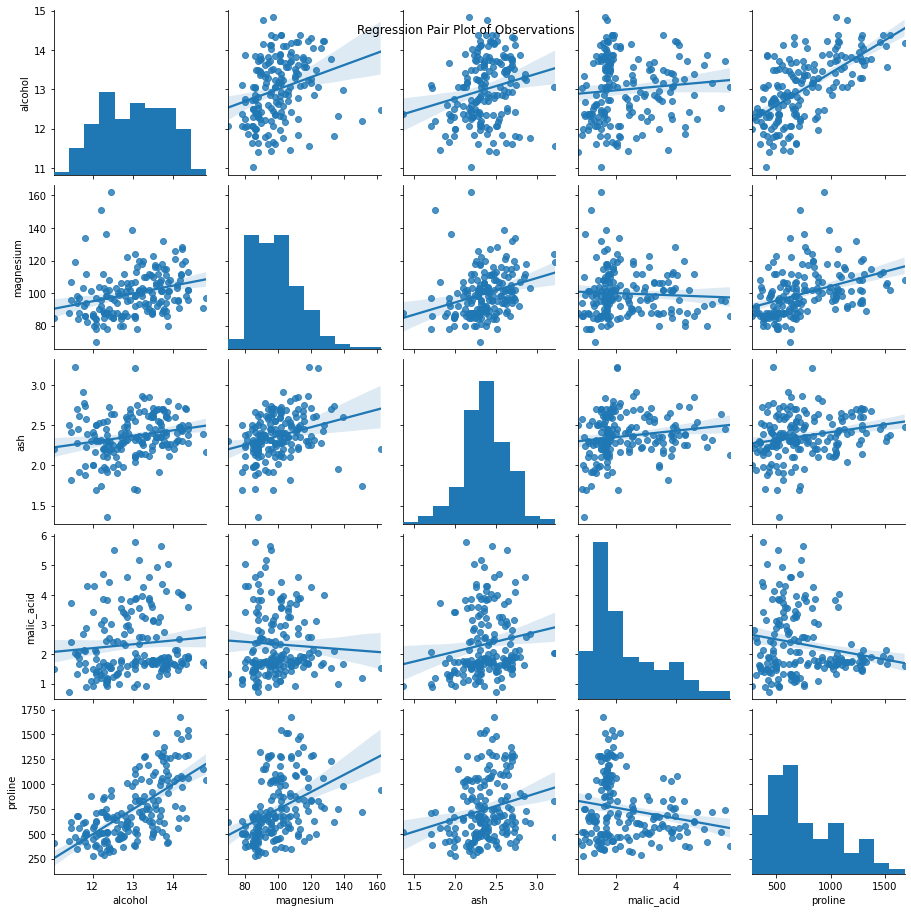

In [13]:
# Regression pair plot considering histogram as diagnol plot
sn.pairplot(df[['alcohol','magnesium','ash','malic_acid','proline']],diag_kind='hist',kind='reg')
plt.suptitle('Regression Pair Plot of Observations')
plt.show()

In [14]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [15]:
from scipy import stats

In [16]:
# Determining normality of data
stats.skew(df)

array([-0.05104747,  1.0308695 , -0.17520678,  0.21124733,  1.08891489,
        0.08590677,  0.02512948,  0.44634901,  0.51276903,  0.86124805,
        0.02091312, -0.30468993,  0.76133617])

In [17]:
stats.kurtosis(df)

array([-0.8622601 ,  0.25734829,  1.07857613,  0.44082314,  2.01280601,
       -0.8458573 , -0.88936501, -0.65295221,  0.50567101,  0.33736976,
       -0.3680254 , -1.08967533, -0.27499971])

In [18]:
# Determining outliers by calculating zscore
zscore = np.abs(stats.zscore(df))

In [19]:
zscore

array([[1.51861254, 0.5622498 , 0.23205254, ..., 0.36217728, 1.84791957,
        1.01300893],
       [0.24628963, 0.49941338, 0.82799632, ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [0.19687903, 0.02123125, 1.10933436, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [0.33275817, 1.74474449, 0.38935541, ..., 1.61212515, 1.48544548,
        0.28057537],
       [0.20923168, 0.22769377, 0.01273209, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.39508604, 1.58316512, 1.36520822, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [20]:
# Determining indexes where zscore is >3
outlierlist = np.where(zscore>3)

In [21]:
outlierlist[0]

array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158])

In [22]:
len(outlierlist[0])

11

In [23]:
# Removing outliers from the dataset
df = df[(zscore<3).all(axis=1)]

In [24]:
df.shape

(168, 13)

In [25]:
# Removing corresponding rows from target dataset 
target = target.drop(index=outlierlist[0])

In [26]:
# Feature extraction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

In [27]:
# Creating training and testing sets
X_training,X_testing,y_training,y_testing = train_test_split(df,target,test_size=0.3,random_state=0)

In [28]:
winemodel = LogisticRegression()

In [29]:
winemodel.fit(X_training,y_training)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [30]:
# Determining score of training and testing sets
winemodel.score(X_training,y_training)

1.0

In [31]:
winemodel.score(X_testing,y_testing)

0.9803921568627451

In [32]:
pred = winemodel.predict(X_testing)

In [33]:
results = confusion_matrix(y_testing,pred)
results

array([[17,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 16]])